<a href="https://colab.research.google.com/github/carvalhopinheiro/Ciencia-de-Dados/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


  #### **1ª Projeto Airbnb**
*by [Paulo Victor](https://www.linkedin.com/in/carvalhopinheiro/)*


# Análise dos Dados do Airbnb - *Província de Tokyo, Japan Região de Kantō*

<center><img alt="Analisando Airbnb" width="30%" src="https://marcas-logos.net/wp-content/uploads/2020/03/Airbnb-logo.jpg"></center>

  O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. E ela **não possui nenhum hotel**, uma pratica em que usa-se a Sharing economy (Economia Compartilhada) atrelada a tecnologia para a solução de problemas a baixo custo.

  Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

  Em outubro de 2021, a Startup fundada 14 anos atrás, já havia **hospedado mais de 1 Bilhão** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

  Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Tokyo" width="70%" src="https://wallpaperaccess.com/full/19066.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Tokyo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Aqui vamos importar as bibliotecas necessarias para a analise de dados/gráficos

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-10-28/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Número de ID do imovel
* `name` - Nome da propriedade anunciada
* `host_id` - Número de ID do proprietario
* `host_name` - Nome do proprietario
* `neighbourhood_group` - Coluna ausente de valor válido
* `neighbourhood` - Nome do Distrito
* `latitude	` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da latitude da propriedade
* `room_type` - Tipo de quarto 
* `price` - Preço do aluguel 
* `minimum_nights` - Minimo de Noites para reserva
* `number_of_reviews` - Numero de feedbacks da propriedade
* `last_review` - Data do ultimo feedback 
* `reviews_per_month` - Número de feedback por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo proprietario
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,11000,3,165,2019-11-14,1.49,1,363,0,M130003350
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7950,3,228,2020-01-18,2.31,1,245,0,M130000243
2,1196177,Stay with host Cozy private room Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74475,139.79731,Private room,3000,2,95,2020-03-17,0.97,1,88,0,M130007760
3,1249571,Unique stay! New&1min to the subway,6809418,Yume,NaN,Shibuya Ku,35.65111,139.72165,Entire home/apt,32571,4,102,2019-11-30,1.46,1,320,1,M130000957
4,1298200,Pine House 2 Bed Room + 2 Toilets,6606987,K & N,NaN,Katsushika Ku,35.73850,139.85167,Entire home/apt,11286,4,339,2020-03-13,3.72,2,183,0,M130009943


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print(df.shape)

# verificar as 5 primeiras entradas do dataset
df.dtypes

(10414, 18)


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Podemos ver que o nosso dataframe possui 10414 linhas e 18 colunas, sendo elas divididos entre `object` - palavras, `int` e `float` - numeros inteiros e decimais respectivamente 

### **Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

neighbourhood_group               100.000000
reviews_per_month                  20.338007
last_review                        20.338007
license                             0.316881
host_name                           0.268869
longitude                           0.000000
name                                0.000000
host_id                             0.000000
neighbourhood                       0.000000
latitude                            0.000000
room_type                           0.000000
number_of_reviews_ltm               0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
id                                  0.000000
dtype: float64

Já que todos os valores de `neighbourhood_group` estão ausentes e 20% de `reviews_per_month ` e `last_review ` também estão ausentes e nenhum deles possui informações relevantes para a análise iremos excluir suas colunas.

Em relação as outras entradas ausentes, como representam menos de 0,35% iremos excluir suas linhas

In [ ]:
df = df.drop(columns=['neighbourhood_group','reviews_per_month','last_review'])
df = df.dropna(axis=0)

Apos a exclusão iremos checar quantos valores foram excluir e se estão de acordo com a previsão


In [ ]:
print(df.shape)
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

(10353, 15)


license                           0.0
number_of_reviews_ltm             0.0
availability_365                  0.0
calculated_host_listings_count    0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price                             0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
host_name                         0.0
host_id                           0.0
name                              0.0
id                                0.0
dtype: float64

Vemos que a exclusão das linhas e colunas com valores nulos levaram a uma redução no dataset de 10.414 linhas para 10.353 e uma redução de 18 para 15 colunas.

Vemos tambem que após a exclusao não sobrou nenhum valor ausente no nosso dateset, isso permite nos aprofundamos a analise, observando a quantidade de outliers.

### **Qual o tipo de distribuição das variáveis?** 

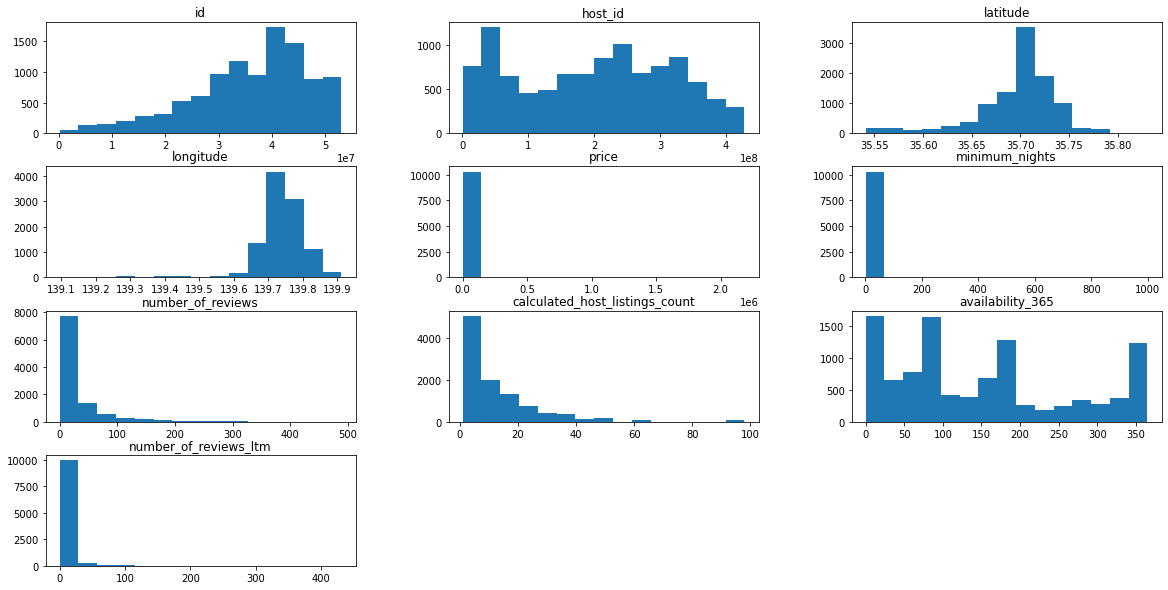

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,10), grid=False);

Analisando os histogramas focando em outliers vemos alguns valores que distocem bastante de uma realidade como é o caso de `minimum_nights` e `price` que possuem como valores maximos 1000 noites mínimas para aluguel e 2 Milhões de ienes por díaria 

Logo, vamos analisar esses duas colunas mais afundo.

# Há Outliers presentes ?

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

É muito importante conseguir identificar e tratar esses outliers, pois eles podem nos mostrar uma imagem incorreta dos nossos dados.

In [ ]:
print(df[['minimum_nights', 'price']].describe().round(2))

       minimum_nights       price
count        10353.00    10353.00
mean             3.83    13515.10
std             25.54    46801.06
min              1.00      825.00
25%              1.00     4498.00
50%              1.00     7300.00
75%              2.00    12857.00
max            999.00  2185000.00


Como visto nos gráficos anterioes essas duas variaveis (colunas) possuem valores bem distoantes no caso de `minimum_nights ` o seu `std` - Desvio Padrão esta em 25, vemos tambem que 75% dos dados possuem como no minimo 2 quantidade noite minimas, enquanto o maior encontrado foi 999 noites, número totalmente fora do padrão

Já na coluna `price` a situção é ainda pior com um `std` - Desvio Padrão de 46801, enquanto 75% dos seus valores tem no minimo valor de 12857 Ienes por noite o maior valor encontrado é de quase 2,2 Milhões

# Tratamento de Dados

Como vimos o dataset possui dados que interferem numa análise de dados mais precisa, logo iremos usar de metodos estatisticos para calculos de limites inferiores e superiores e assim excluir os dados fora dos limites calculados, melhorando assim a qualidade dos dados auxiliando na tomada de decisão da maneira mais focada e precisa.

Usaremos a regra do IQR Score para o calculo desses limites.

Primeiramente, vamos lembrar o que é o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

 #### IQR = Q3 - Q1


Q1, Q3 e IQR `price` 

In [ ]:
q1_price = df.price.quantile(0.25)
q3_price = df.price.quantile(0.75)
iqr_price = q3_price - q1_price

Q1,Q3 e IQR `minimum_nights`

In [ ]:
q1_minimum_nights = df.minimum_nights.quantile(0.25)
q3_minimum_nights = df.minimum_nights.quantile(0.75)
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights

Limites superiores e inferiores de `price` e `minimum_nights`

In [ ]:
sup_price = q3_price + 1.5 * iqr_price
inf_price = q1_price - 1.5 * iqr_price
sup_minimum_nights = q3_minimum_nights + 1.5 * iqr_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * iqr_minimum_nights


In [ ]:
print(f'Limite superior de price {sup_price}')
print(f'limite inferior de price {inf_price}')
print(f'IQR de price {iqr_price}')

Limite superior de price 25395.5
limite inferior de price -8040.5
IQR de price 8359.0


In [ ]:
print(f'Limite superior de minimum_nights {sup_minimum_nights}')
print(f'limite inferior de minimum_nights {inf_minimum_nights}')
print(f'IQR de minimum_nights {iqr_minimum_nights}')

Limite superior de minimum_nights 3.5
limite inferior de minimum_nights -0.5
IQR de minimum_nights 1.0


### Graficos box plot de `price` e `minimum_nights`

832 Entradas acima do limite de price
8.04% Entradas acima do limite de price
0 Entradas igual a zero


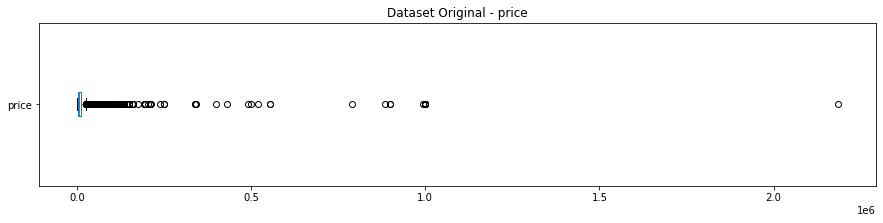

In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15,3));
plt.title('Dataset Original - price')
print("{} Entradas acima do limite de price".format(len(df[df.price > sup_price])))
print("{:.2f}% Entradas acima do limite de price".format(len(df[df.price > sup_price]) / df.shape[0] * 100))
print("{} Entradas igual a zero".format(len(df[df.price == 0])))

779 Entradas acima do limite de minimum_nights
7.52% Entradas acima do limite de minimum_nights


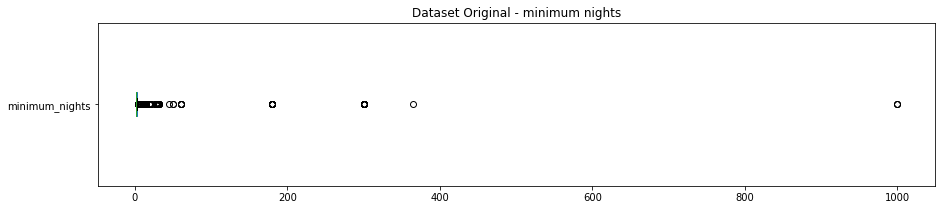

In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3));
plt.title('Dataset Original - minimum nights')
print("{} Entradas acima do limite de minimum_nights".format(len(df[df.minimum_nights > sup_minimum_nights])))
print("{:.2f}% Entradas acima do limite de minimum_nights".format(len(df[df.minimum_nights > sup_minimum_nights]) / df.shape[0] * 100))

Agora que sabemos a quantidade valores fora dos limites calculados, vamos excluilos ou trata-los como ambos os valores possuem dados em torno de 8% vamos optar por exclui-los, pois essa quantidade de irar inteferior negativamente na nossa analise 

### Exclusão dos outliers


In [ ]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace=True)
print(f'Quantide de linhas e colunas antes da exclusão {df.shape}')
print(f'Quantidade de linhas e colunas depois da exclusão {df_clean.shape}')

print('A quantide de linhas excluidas foram de 1552')

Quantide de linhas e colunas antes da exclusão (10353, 15)
Quantidade de linhas e colunas depois da exclusão (8801, 15)
A quantide de linhas excluidas foram de 1552


In [ ]:
print('{} ANTES {}'.format(15*'-',15*'-'))
print(df[['minimum_nights', 'price']].describe().round(2))
print('{} DEPOIS {}'.format(15*'-',15*'-'))
print(df_clean[['minimum_nights', 'price']].describe().round(2))

--------------- ANTES ---------------
       minimum_nights       price
count        10353.00    10353.00
mean             3.83    13515.10
std             25.54    46801.06
min              1.00      825.00
25%              1.00     4498.00
50%              1.00     7300.00
75%              2.00    12857.00
max            999.00  2185000.00
--------------- DEPOIS ---------------
       minimum_nights     price
count         8801.00   8801.00
mean             1.40   8395.38
std              0.59   5325.81
min              1.00    825.00
25%              1.00   4278.00
50%              1.00   6793.00
75%              2.00  11229.00
max              3.00  25286.00


Vemos que a exclusão de alguns outliers representaram uma diferença enorme na nossa analise valores como 2,2 milhões referente ao preço maximo por estadia se tornou 25 mil, valor mais alto do número minimos de noites saíram de 999 para 3 noites, redução bastante significativa no desvio padrão somente com a exclusão de alguns outliers

#Analise dos dados

### Novo Histrograma após a exclusão dos outliers

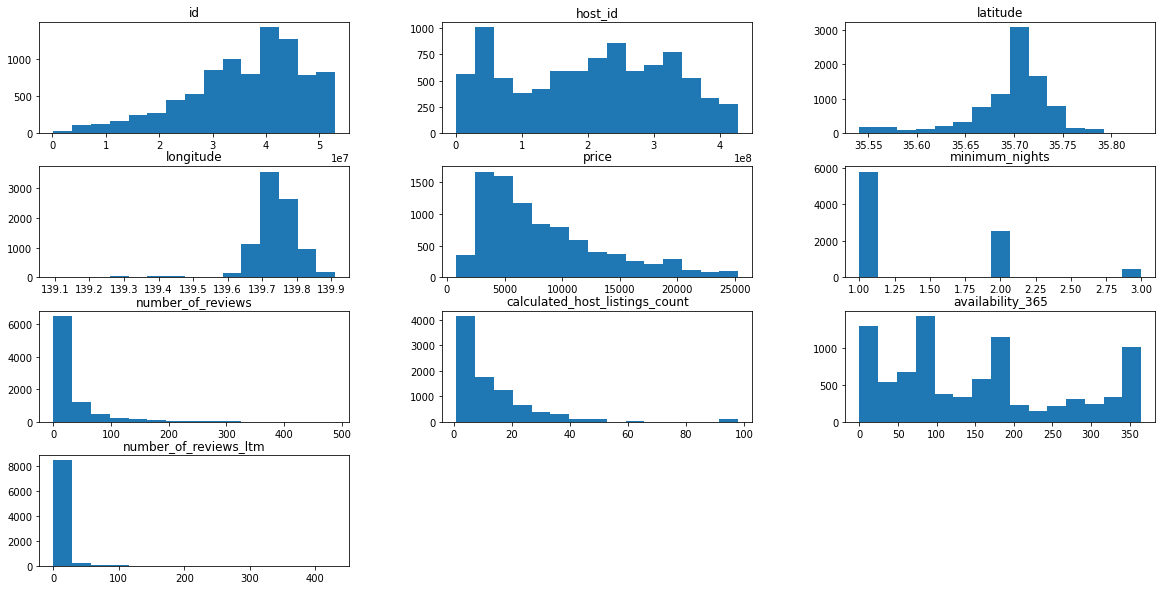

In [ ]:
df_clean.hist(bins=15, figsize=(20,10), grid=False);

Após a exclusão vemos que os histogramas do `price` e `minimum_nights` ficaram mais apresentaveis e coerente com a realidade

## **Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.060829,-0.004912,0.053002,-0.049234
minimum_nights,-0.060829,1.000000,0.070783,-0.057780,0.068063
number_of_reviews,-0.004912,0.070783,1.000000,-0.154467,0.042362
calculated_host_listings_count,0.053002,-0.057780,-0.154467,1.000000,0.026294
availability_365,-0.049234,0.068063,0.042362,0.026294,1.000000


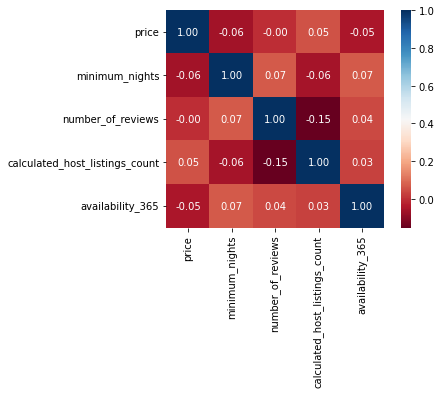

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

As variaveis númericas analisadas não possuem nenhum grau de causalidade ou correlação com valores significativos

#Valores da analise de dados

## **Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
print('¥{:.2f}'.format(df_clean.price.mean()))

¥8395.38


## **Qual o tipo de imóvel mais alugado no Airbnb?**

Entire home/apt    5830
Private room       2290
Hotel room          356
Shared room         325
Name: room_type, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


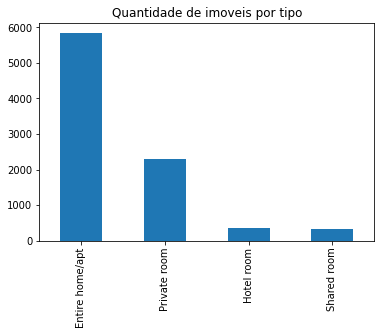

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
print(df_clean.room_type.value_counts())
print()
print(df_clean.room_type.value_counts().plot(kind='bar'))
plt.title('Quantidade de imoveis por tipo');

**Entire home/apt - Casa inteiro/Apartamento**

**Private room - Quarto Privado**

**Shared room -  Quarto Compartilhado**
 
**Hotel room - Quarto de Hotel**

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]*100

Entire home/apt    66.242472
Private room       26.019770
Hotel room          4.044995
Shared room         3.692762
Name: room_type, dtype: float64

## **Quantas localidades existem no dataset ?**

In [ ]:
df_clean.neighbourhood.value_counts().shape

(48,)

A província do Japão possui 48 Localidades/Cidades

## **Qual a localidade mais cara do dataset ?**



neighbourhood
Mitaka Shi       18840.33
Musashino Shi    10775.00
Chiyoda Ku       10679.09
Shibuya Ku       10071.14
Chuo Ku           9966.63
Minato Ku         9729.33
Ome Shi           9728.50
Taito Ku          9558.83
Suginami Ku       9525.62
Koganei Shi       9443.00
Name: price, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


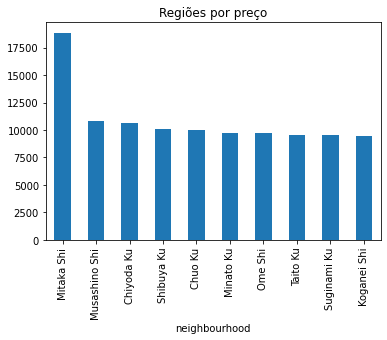

In [ ]:
# ver preços por distrito, na média
print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).round(2)[:10])
print()
print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).round(2)[:10].plot(kind='bar'))
plt.title('Regiões por preço');

## **Qual a localidade mais barata do dataset ?**

neighbourhood
Musashimurayama Shi    3000.00
Hamura Shi             3086.00
Kiyose Shi             3571.00
Hino Shi               3704.47
Akishima Shi           3873.00
Higashikurume Shi      4000.00
Kunitachi Shi          4118.43
Hinohara Mura          5000.00
Fuchu Shi              5094.04
Akiruno Shi            5257.25
Name: price, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


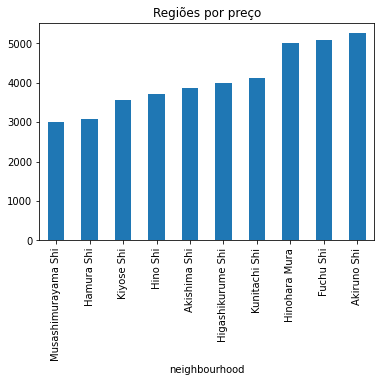

In [ ]:
print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True).round(2)[:10])
print()
print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True).round(2)[:10].plot(kind='bar'))
plt.title('Regiões por preço');

##Quantide de imovel por região (5 mais caras)


Região de Mitaka Shi


In [ ]:
print(df_clean[df_clean.neighbourhood == "Mitaka Shi"].shape)
df_clean[df_clean.neighbourhood == "Mitaka Shi"].price

(3, 15)


69      22857
71      24857
6647     8807
Name: price, dtype: int64

Possui somente 3 imoveis com média de preços em ¥18840.33

Região de Musashino Shi


In [ ]:
print(df_clean[df_clean.neighbourhood == "Musashino Shi"].shape)
df_clean[df_clean.neighbourhood == "Musashino Shi"].price

(4, 15)


1651     3000
2499    10571
8567    17386
8568    12143
Name: price, dtype: int64

Possui somente 4 imoveis com média de preços em ¥10775.00

Região de Chiyoda Ku

In [ ]:
print(df_clean[df_clean.neighbourhood == "Chiyoda Ku"].shape)
df_clean[df_clean.neighbourhood == "Chiyoda Ku"].price.sort_values(ascending=False)

(141, 15)


2618    25136
3084    25136
2583    25136
2619    25136
2584    25136
        ...  
9002     2100
8723     1980
8724     1980
8855     1980
2650     1854
Name: price, Length: 141, dtype: int64

Possui 141 imoveis

In [ ]:
df_clean[df_clean.neighbourhood == "Chiyoda Ku"].price.describe()

count      141.000000
mean     10679.085106
std       5897.378178
min       1854.000000
25%       6086.000000
50%      10106.000000
75%      13389.000000
max      25136.000000
Name: price, dtype: float64

Vemos que mesmo Chiyoda Ku tendo uma média de aluguel 10680 Ienes, é possível alugar a valores bem menores, já que 25% dos alugueis possuem valores menos que 6086 Ienes

Região de Shibuya Ku

In [ ]:
print(df_clean[df_clean.neighbourhood == "Shibuya Ku"].shape)
df_clean[df_clean.neighbourhood == "Shibuya Ku"].price.sort_values(ascending=False)

(459, 15)


1078    25000
8956    24000
6506    24000
348     23286
5266    23000
        ...  
8794     2918
3091     2857
8797     2755
5058     2218
5060     2172
Name: price, Length: 459, dtype: int64

Possui 459 imoveis

Região de Chuo Ku

In [ ]:
print(df_clean[df_clean.neighbourhood == "Chuo Ku"].shape)
df_clean[df_clean.neighbourhood == "Chuo Ku"].price.sort_values(ascending=False)

(330, 15)


8405    25000
8851    25000
2600    25000
9358    23000
8752    23000
        ...  
9063     2000
7525     2000
7524     2000
7523     2000
7514     2000
Name: price, Length: 330, dtype: int64

Possui 330 imoveis 

### Grafico baseado na latitude e longitude em relaçao ao preço

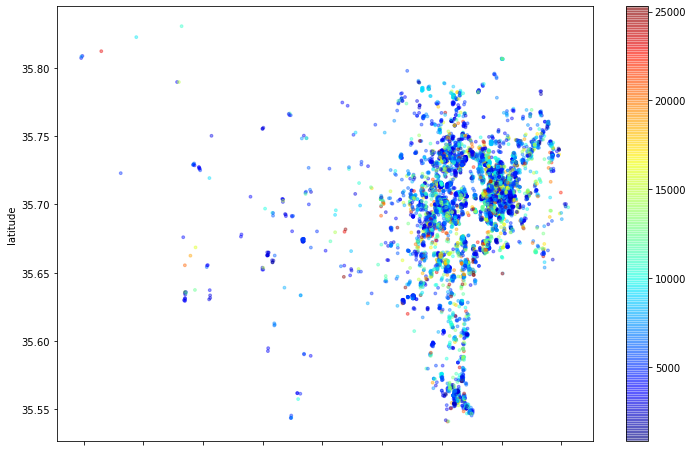

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
print('Média de numero de noites mínima: {:.0f}'.format(df_clean.minimum_nights.mean()))

Média de numero de noites mínima: 1


# Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos, nota-se que a media de noites minimas para se alugar um imovel no Japão é de uma noite a um valor médio de ¥8395.38.


